# Recommendation System

**Kami akan menggunakan sistem rekomendasi berbasis konten untuk masalah berikut**

In [8]:
#importing libraries
import pandas as pd
import numpy as np

In [9]:
import pandas as pd
import zipfile
import os
import shutil

# Nama file ZIP
zip_file_path_movies = 'tmdb_5000_movies.zip'
zip_file_path_credits = 'tmdb_5000_credits.zip'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file_path_movies, 'r') as zip_ref:
    zip_ref.extractall('temp_folder_movies')

with zipfile.ZipFile(zip_file_path_credits, 'r') as zip_ref:
    zip_ref.extractall('temp_folder_credits')

# Baca file CSV yang mungkin tidak dikompresi langsung dari folder sementara
movies_file_path = 'temp_folder_movies/tmdb_5000_movies.csv'
credits_file_path = 'temp_folder_credits/tmdb_5000_credits.csv'

if os.path.exists(movies_file_path):
    movies = pd.read_csv(movies_file_path)
else:
    movies = pd.read_csv(movies_file_path + '.gz', compression='gzip')

if os.path.exists(credits_file_path):
    credits = pd.read_csv(credits_file_path)
else:
    credits = pd.read_csv(credits_file_path + '.gz', compression='gzip')

# Hapus folder sementara setelah selesai membaca
shutil.rmtree('temp_folder_movies')
shutil.rmtree('temp_folder_credits')


In [10]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [11]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [12]:
#Lets merge both the dataset
print("before merge")
print(movies.shape)
print(credits.shape)
movies=movies.merge(credits,on='title')
print("After merge:",movies.shape)

before merge
(4803, 20)
(4803, 4)
After merge: (4809, 23)


In [13]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [14]:
#checking columns
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

Mari kita hapus kolom-kolom yang tidak diperlukan yang mungkin tidak berguna untuk analisis kita<br>
1.budget<br>
2.homepage<br>
3.original_language (95% of the languages are english movies,so we going to this column as well)<br>
4.popularity<br>
5.production_companies<br>
6.production_countries<br>
7.release_date<br>
8.revenue<br>
9.runtime<br>
10.spoken_languages<br>
11.status<br>
12.tagline<br>
13.vote_count<br>
14.vote_average<br>
15.id<br>

In [15]:
# selecting only required columns
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [16]:
#Checking null values
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
#dropping null values
movies.dropna(inplace=True)
movies.isnull().sum()


movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [18]:
#checking duplicated rows
movies.duplicated().sum()

0

In [19]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Approaching the problem **tags** way

Tag sangat penting dalam rekomendasi berbasis konten karena tag memberikan informasi yang berguna tentang film dengan cara yang ringkas dan terorganisir.

Bayangkan Anda sedang berada di perpustakaan dan mencari buku yang bagus untuk dibaca. Alih-alih menelusuri setiap buku, Anda menemukan bahwa setiap buku memiliki tag yang melekat padanya. Tag ini mewakili genre, tema, atau gaya buku yang berbeda, seperti "misteri", "roman", "petualangan", atau "sejarah". Tag ini membantu Anda dengan cepat mengidentifikasi jenis buku yang Anda minati.

Secara sederhana, tag membantu sistem rekomendasi memahami jenis film yang Anda sukai. Tag menyediakan cara untuk mengkategorikan film berdasarkan genre, tema, atau atribut tertentu. Dengan menganalisis tag yang terkait dengan film yang Anda sukai, sistem dapat menyarankan film lain dengan tag yang serupa, sehingga memudahkan Anda menemukan film yang sesuai dengan minat Anda.


**Kami menggunakan tag untuk merekomendasikan film kepada pengguna**<br>

kami mengambil tag dengan kombinasi kolom di bawah ini<br>

tags=overview+ genres + keywords + cast + crew

untuk mencapai tujuan di atas, kita membutuhkan kolom-kolom dalam format yang tepat

**genres column**

In [20]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

seperti yang bisa kita lihat format kolom genre berbeda, kita perlu mengekstrak semua genre dari kamus dan menyimpannya di kolom yang berbeda

In [21]:
# convert a column of genre representations in a DataFrame into a more usable format by extracting and storing only the genre names.

import ast
# Define a function to extract genre names from a string representation of genres
def convert(text):
    genres = []  # Initialize an empty list to store genre names
    for i in ast.literal_eval(text):  # Convert the string into a list of dictionaries using safe evaluation
        genres.append(i['name'])  # Retrieve the name of each genre dictionary and add it to the list
    return genres  # Return the list of genre names

# Apply the 'convert' function to the 'genres' column of the 'movies' DataFrame
movies['genres'] =  movies['genres'].apply(convert)


In [22]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Kami mendapatkan genre dalam format yang diinginkan, Mari kita lakukan hal yang sama untuk kolom lainnya

**keywords column**

format kata kunci mirip dengan format genre, kita akan menggunakan fungsi yang sama dengan yang telah kita gunakan untuk genre

In [23]:
# Apply the 'convert' function to the 'keywords' column of the 'movies' DataFrame
movies['keywords'] =  movies['keywords'].apply(convert)

In [24]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**cast column**

dari kolom cast, kami hanya mengambil 3 nama aktor teratas (nama aktor yang sebenarnya) untuk film yang bersangkutan

In [25]:
def convert_actors(text):
    actors = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            actors.append(i['name'])
        counter+=1
    return actors 

movies['cast'] = movies['cast'].apply(convert_actors)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**crew column**

In [26]:
#from crew column we are interested in fetching only director's name
def fetch_director(text):
    director = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            director.append(i['name'])
    return director 

movies['crew'] = movies['crew'].apply(fetch_director)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


**overview column**

In [27]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

tidak seperti semua kolom lain untuk tag, kami mengubah kolom ikhtisar menjadi string sehingga nantinya kami dapat menggabungkan semua kolom untuk tag

In [28]:
#Need to convert overview column into list for concatenation as it is in string and list+string concatenation not possible
movies['overview'] = movies['overview'].apply(lambda x:x.split())

**Entity Recognition**:
Entity recognition melibatkan identifikasi dan pengkategorian entitas bernama tertentu, seperti nama orang atau lokasi, dalam teks. Dalam beberapa kasus, menghilangkan spasi atau mempertimbangkan entitas multi-kata sebagai satu kesatuan dapat menjadi penting. Misalnya, mengenali "New York" sebagai satu kesatuan daripada dua kata yang terpisah.

Kita perlu menghapus spasi di antara kata-kata dari kolom genre, kata kunci, pemeran dan kru, untuk menyempurnakan tag kita

In [29]:
#Remove spaces between words in specific columns containing lists of words
movies['cast'] = movies['cast'].apply(lambda x: [word.replace(" ", "") for word in x])
movies['crew'] = movies['crew'].apply(lambda x: [word.replace(" ", "") for word in x])
movies['genres'] = movies['genres'].apply(lambda x: [word.replace(" ", "") for word in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [word.replace(" ", "") for word in x])

In [30]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


Karena kita telah menghapus spasi di antara kata-kata, sekarang kita menggabungkan kolom "ikhtisar", "genre", "kata kunci", "pemeran" dan "kru" untuk membentuk kolom tag kita

In [31]:
#concatenating the columns for tags column
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [32]:
# we have utilised the text from 'overview','genres','keywords','cast','crew' columns and transformed that text to "tags" column,so we are dropping those five columns now
movies = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [33]:
movies.head(2)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


Kolom "tags" terdiri dari kata-kata dalam daftar yang perlu diubah menjadi string untuk melakukan vektorisasi

In [34]:
# Joining words in the 'tags' column into a single string
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))
movies.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


# Bag of words

vektorisasi BoW adalah teknik yang digunakan untuk merepresentasikan dokumen teks dengan menghitung kemunculan kata. Teknik ini menyederhanakan teks menjadi vektor numerik, sehingga kita dapat membandingkan, menganalisis, dan memahami pentingnya kata-kata di berbagai dokumen.

In [35]:
#we are taking most frequent 5000 words from the vocabulary,also we are removing all the stopwords 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

In [36]:
# convert textual movie tags into a numerical representation
vector = cv.fit_transform(movies['tags']).toarray()

kode di atas membuat representasi numerik dari tag film, yang dapat digunakan untuk menghitung kemiripan antar film.

In [37]:
vector.shape

(4806, 5000)

Kami memiliki total 4806 film dan setiap film telah direpresentasikan menggunakan sekumpulan tag, setelah mengubah tag ini menjadi vektor numerik, representasi vektor yang dihasilkan memiliki ukuran `(4806, 5000)`.

Angka pertama, 4806, menunjukkan jumlah film dalam kumpulan data. Ini berarti bahwa ada 4806 baris dalam representasi vektor, dengan setiap baris berhubungan dengan film tertentu.

Angka kedua, 5000, menunjukkan jumlah tag unik yang ditemukan di seluruh dataset. Ini berarti bahwa setiap film telah direpresentasikan sebagai vektor yang terdiri dari 5000 angka. Setiap angka dalam vektor berhubungan dengan tag tertentu, dan nilainya mewakili ada atau tidaknya tag tersebut untuk film yang bersangkutan.

(4806, 5000) memberi tahu kita bahwa representasi vektor memiliki 4806 baris (satu untuk setiap film) dan 5000 kolom (mewakili ada atau tidaknya 5000 tag unik dalam film).

# Cosine similarity

Cosine similarity adalah ukuran yang digunakan untuk menentukan seberapa mirip dua vektor dalam ruang multi-dimensi. Dalam konteks NLP (Pemrosesan Bahasa Alami), kemiripan kosinus sering digunakan untuk membandingkan kemiripan antara dua dokumen atau kumpulan kata.
1. Bayangkan Anda memiliki dua vektor yang mewakili dua dokumen. Setiap vektor mewakili frekuensi kata atau istilah dalam masing-masing dokumen.

2. Kemiripan kosinus menghitung sudut antara kedua vektor ini. Semakin kecil sudutnya, semakin mirip vektor-vektor tersebut (dan dengan demikian, dokumen-dokumen tersebut) dianggap semakin mirip.

3. Jika sudut antara vektor mendekati 0 derajat, itu berarti vektor mengarah ke arah yang sama dan memiliki tingkat kemiripan yang tinggi. Sebaliknya, jika sudutnya mendekati 90 derajat, berarti vektor-vektor tersebut tegak lurus dan memiliki kemiripan yang rendah.

4. Skor kemiripan kosinus adalah nilai antara 0 dan 1. Skor 1 menunjukkan bahwa vektor-vektor tersebut identik, sedangkan skor 0 berarti vektor-vektor tersebut sama sekali berbeda.

Dalam istilah yang lebih sederhana, kesamaan kosinus mengukur seberapa dekat dua vektor sejajar satu sama lain. Semakin mirip vektornya, semakin kecil sudut di antara keduanya, dan semakin tinggi skor kemiripan kosinusnya. Ini membantu kita memahami kemiripan atau keterkaitan antara dokumen atau kumpulan kata berdasarkan representasi vektornya.

Cosine similarity banyak digunakan dalam tugas-tugas NLP seperti pengelompokan dokumen, pencarian informasi, atau sistem rekomendasi. Dengan membandingkan sudut antara vektor, kita dapat mengidentifikasi dokumen yang mirip, menemukan kata-kata yang terkait, atau bahkan merekomendasikan artikel atau produk yang mirip berdasarkan konten tekstualnya.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
# Menghitung kemiripan antara vektor menggunakan metode yang disebut kemiripan kosinus.
#Secara lebih sederhana, ia mengambil sebuah vektor (representasi matematis dari film) dan membandingkannya dengan vektor lain yang mewakili film yang berbeda.
#Metode ini menghitung seberapa mirip vektor-vektor ini dengan mengukur cosinus sudut di antara keduanya. 
#Nilai kemiripan yang dihasilkan menunjukkan seberapa dekat hubungan antara film berdasarkan representasi vektornya.
#Pada dasarnya, ini membantu untuk menentukan seberapa mirip dua film dengan melihat representasi numerik mereka dan menghitung skor kemiripan.

similarity = cosine_similarity(vector)

In [40]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

Output di atas adalah matriks angka yang merepresentasikan kemiripan antara film yang berbeda. Setiap angka dalam matriks mewakili skor kemiripan antara dua film.

Dalam istilah yang lebih sederhana, bayangkan Anda memiliki kisi-kisi di mana baris dan kolom mewakili film yang berbeda. Setiap angka dalam kisi-kisi menunjukkan seberapa mirip dua film satu sama lain. Semakin tinggi angkanya, semakin mirip kedua film tersebut.

Sebagai contoh, jika Anda melihat baris pertama dari matriks, angka-angka tersebut menunjukkan kemiripan antara film pertama dan semua film lainnya. Angka 1.0 berarti film pertama identik dengan dirinya sendiri (kemiripan sempurna), sedangkan angka lain seperti 0.08964215, 0.06071767, dan seterusnya menunjukkan kemiripan antara film pertama dengan film lain dalam kumpulan data.

Demikian pula, setiap baris dan kolom dalam matriks berhubungan dengan film tertentu, dan angka-angka dalam baris atau kolom tersebut menunjukkan kemiripan antara film tersebut dan semua film lainnya.

Sekarang, Mari kita tentukan fungsi yang mengambil nama film sebagai input dan merekomendasikan film yang mirip dengan nama film yang dimasukkan

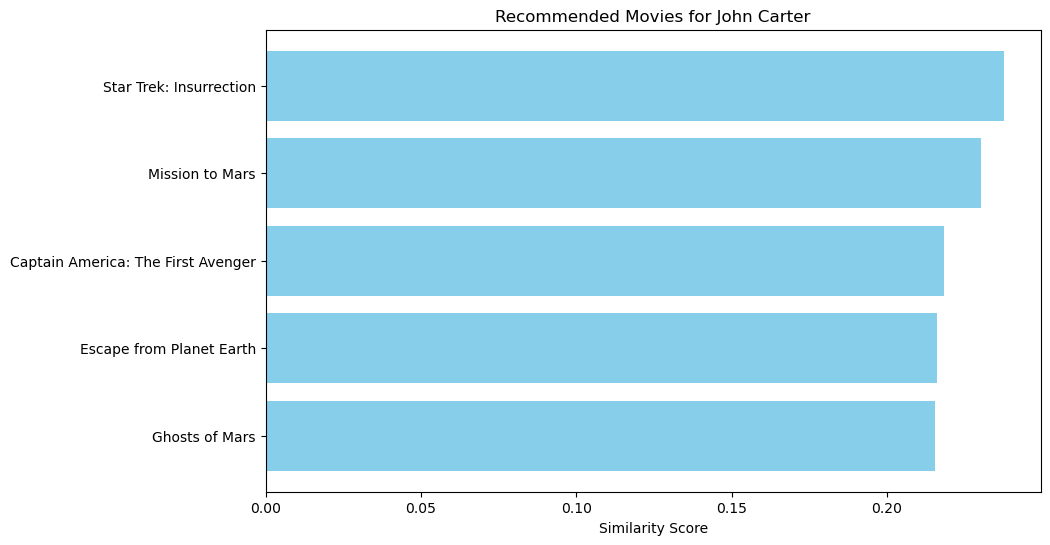

In [41]:
import matplotlib.pyplot as plt

#fungsi merekomendasikan yang mengambil nama film sebagai masukan. 
#Kemudian menghitung kemiripan antara film yang diberikan dan semua film lain dalam kumpulan data.
#Jarak antara film diurutkan dalam urutan menurun, dan 5 film yang paling mirip (tidak termasuk film yang diberikan itu sendiri) dicetak.
def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    
    # Extract movie titles and similarity scores for the top 5 recommendations
    recommended_movies = [movies.iloc[i[0]].title for i in distances[1:6]]
    similarity_scores = [i[1] for i in distances[1:6]]
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.barh(recommended_movies, similarity_scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title(f'Recommended Movies for {movie}')
    plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
    plt.show()

# Get the recommendation for 'John Carter' and plot the results
recommend('John Carter')

# Conclusion


Kami mengembangkan sistem rekomendasi film berdasarkan tag film menggunakan dataset Kaggle. Tujuannya adalah untuk memberikan rekomendasi film yang mirip dengan film tertentu.

Kami memulai dengan beberapa pemrosesan awal dan menyiapkan kolom **tags**, membuat vektor tag film menggunakan **CountVectorizer** dari pustaka scikit-learn. Hal ini memungkinkan kami untuk merepresentasikan tag tekstual sebagai vektor numerik. Selanjutnya, kami menghitung **kemiripan kosinus** antara vektor-vektor ini menggunakan fungsi cosine_similarity yang juga disediakan oleh scikit-learn.

Dengan menggunakan skor kemiripan kosinus, kami dapat menemukan film yang paling mirip dengan film yang diberikan. Sebagai contoh, ketika kami memasukkan 'John Carter' sebagai film, sistem menghasilkan rekomendasi berikut:

Star Trek: Insurrection<br>
Mission to Mars<br>
Captain America: The First Avenger<br>
Escape from Planet Earth<br>
Ghosts of Mars<br>

Rekomendasi ini didasarkan pada kemiripan tag film, yang menunjukkan bahwa film-film ini memiliki tema atau genre yang serupa.

